<a href="https://colab.research.google.com/github/prajwalnigam321/final_test/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

aerofit_treadmill.csv  sample_data


**Problem Statement**-The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
a=pd.read_csv('aerofit_treadmill.csv')
a.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
a.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
a.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [6]:
a.info() #states that there is no null value in columns
#datatype discussed below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
print(f"Number of rows: {a.shape[0]}\nNumber of columns: {a.shape[1]}")

Number of rows: 180
Number of columns: 9


In [8]:
a.ndim #2-d 

2

In [9]:
print(a['Product'].value_counts())
print(a['Age'].value_counts())
print(a['Gender'].value_counts())
print(a['Education'].value_counts())
print(a['MaritalStatus'].value_counts())
print(a['Usage'].value_counts())
print(a['Fitness'].value_counts())
print(a['Income'].value_counts())

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64
Male      104
Female     76
Name: Gender, dtype: int64
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64


In [10]:
a.nunique() #number of unique elements

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [11]:
a.corr() #correlation of all columns

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


**Observations**:
1. There are no missing values in the data.
2. There are 3 unique products in the dataset.
3. KP281 is the most frequent product.
4. Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
5. Most of the people are having 16 years of education i.e. 75% of persons are 
having education <= 16 years.
6. Out of 180 data points, 104's gender is Male and rest are the female.
7. Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

In [12]:
a['Product'].unique() #unique elements

array(['KP281', 'KP481', 'KP781'], dtype=object)

**Univariate Analysis**


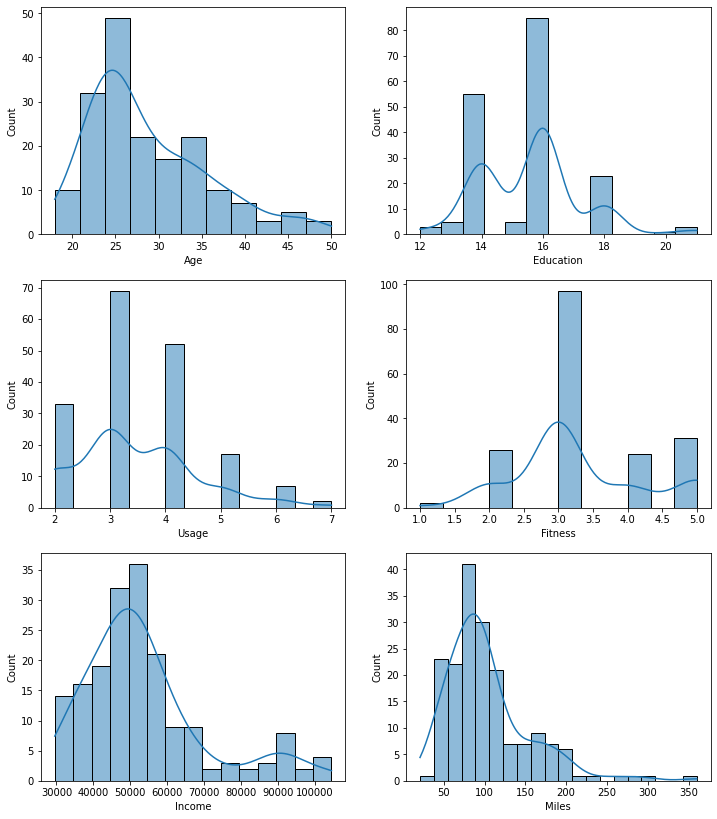

In [13]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=a,x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=a,x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=a,x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=a,x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=a,x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=a,x="Miles", kde=True, ax=axis[2,1])
plt.show()

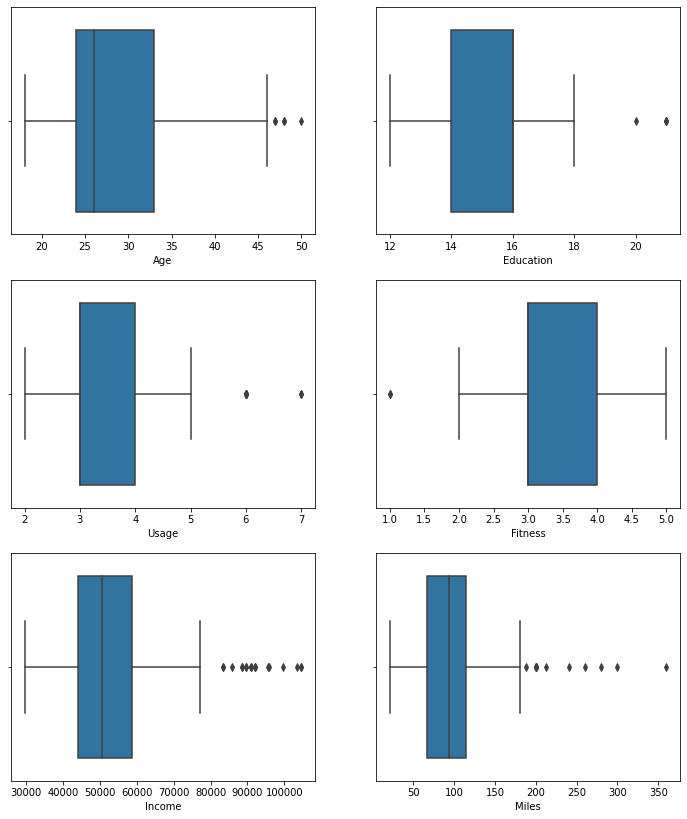

In [14]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=a, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=a, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=a, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=a, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=a, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=a, x="Miles", orient='h', ax=axis[2,1])
plt.show()              #outliers detection

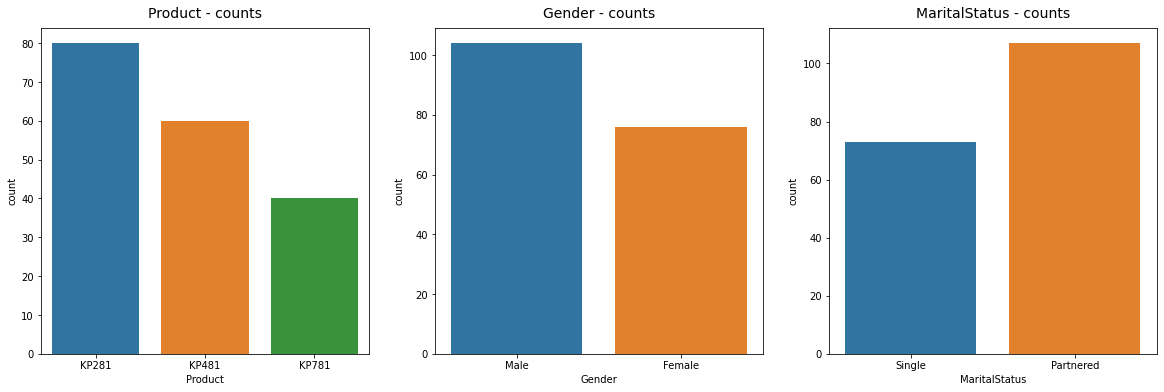

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=a, x='Product', ax=axs[0])
sns.countplot(data=a, x='Gender', ax=axs[1])
sns.countplot(data=a, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

In [16]:
b = a[['Product', 'Gender', 'MaritalStatus']].melt()
b.groupby(['variable', 'value'])[['value']].count() / len(a)#normalized count for each variable is shown below

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

**Bivariate Analysis**

Text(0.5, 1.0, 'Product vs MaritalStatus')

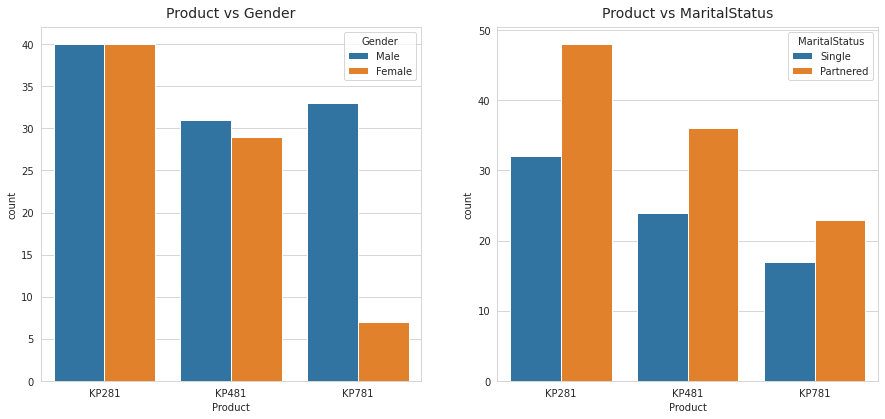

In [17]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=a, x='Product', hue='Gender', ax=axs[0])
sns.countplot(data=a, x='Product', hue='MaritalStatus',  ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14) 
#Gender or MaritalStatus have any effect on the product purchased


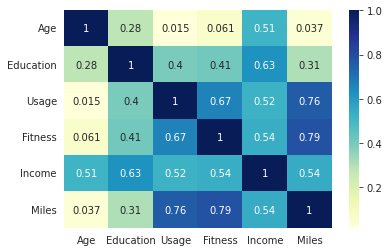

In [18]:
sns.heatmap(a.corr(), cmap="YlGnBu", annot=True) #heatmap for the correlation between all columns

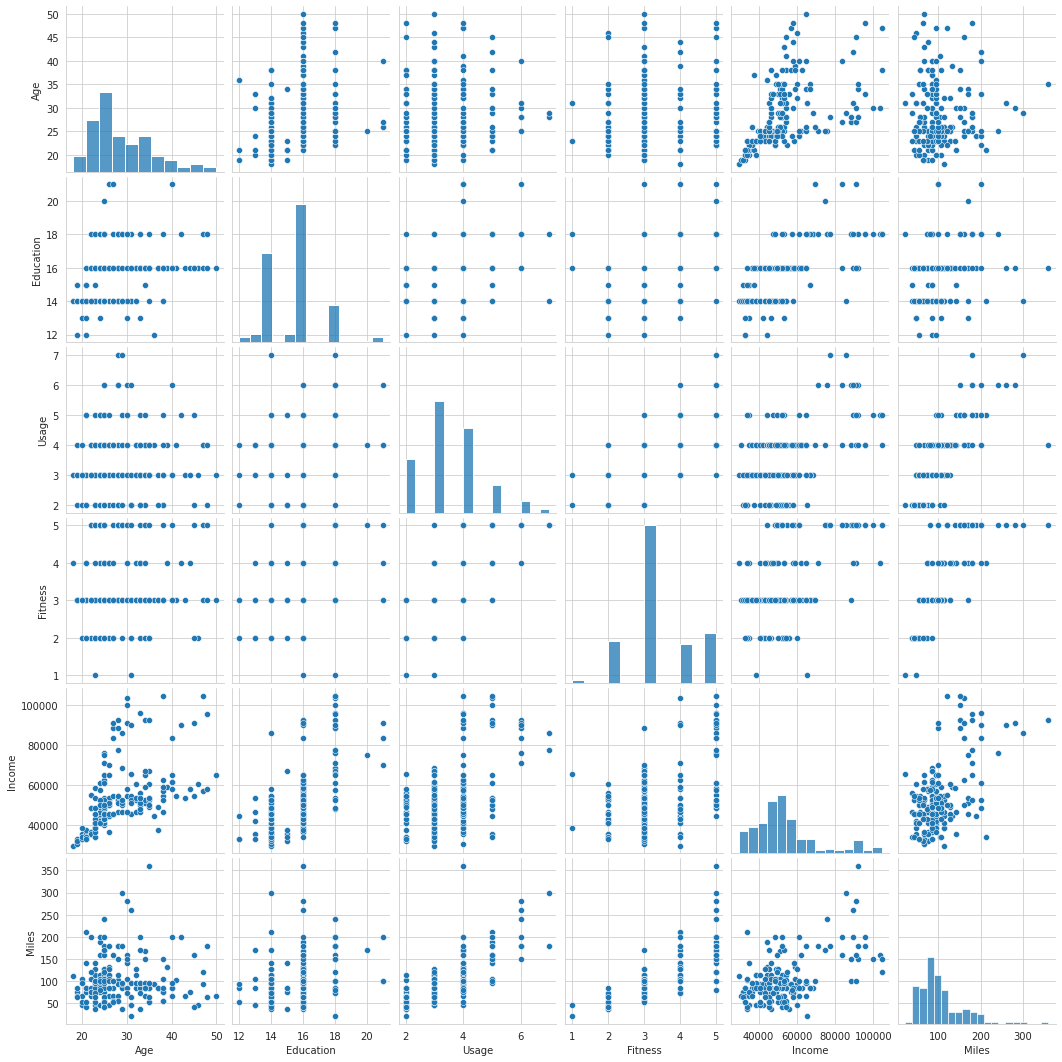

In [19]:
sns.pairplot(a)
plt.show()#pairplot

**Computing Marginal & Conditional Probabilities
Marginal Probability**

In [20]:
a['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [21]:
pd.crosstab(index='Product',columns=a['MaritalStatus'])

MaritalStatus,Partnered,Single
row_0,,
Product,107,73


In [22]:
pd.crosstab(index='Product',columns=a['Gender'])

Gender,Female,Male
row_0,,
Product,76,104


In [23]:
pd.crosstab(index='Product',columns=a['Usage'])

Usage,2,3,4,5,6,7
row_0,,,,,,
Product,33,69,52,17,7,2


**Conditional Probabilities**

In [24]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."
    
    a1 = pd.crosstab(index=a['Gender'], columns=[a['Product']])
    p_781 = a1['KP781'][gender] / a1.loc[gender].sum()
    p_481 = a1['KP481'][gender] / a1.loc[gender].sum()
    p_281 = a1['KP281'][gender] / a1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {a1.loc['Male'].sum()/len(a):.2f}")
        print(f"P(Female): {a1.loc['Female'].sum()/len(a):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



**Probability of each product given MaritalStatus**

In [25]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status != "Single" and status != "Partnered":
        return "Invalid marital status value."
    
    b = pd.crosstab(index=a['MaritalStatus'], columns=[a['Product']])
    p_781 = b['KP781'][status] / b.loc[status].sum()
    p_481 = b['KP481'][status] / b.loc[status].sum()
    p_281 = b['KP281'][status] / b.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {b.loc['Single'].sum()/len(a):.2f}")
        print(f"P(Partnered): {b.loc['Partnered'].sum()/len(a):.2f}\n")
    
    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



**Insights**



1. There are no missing values in the data.
2. There are 3 unique products in the dataset.
3. KP281 is the most frequent product.
4. Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
5. Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
6. Out of 180 data points, 104's gender is Male and rest are the female.
7. Standard deviation for Income & Miles is very high. These variables might have the outliers in it.
8. Even from the boxplots it is quite clear that-Age, Education and Usage are having very few outliers.
9. While Income and Miles are having more outliers.
10. KP281 is the most frequent product.
11. Thare are more Males in the data than Females.
12. More Partnered persons are there in the data.
13. Product-
44.44% of the customers have purchased KP281 product.
33.33% of the customers have purchased KP481 product.
22.22% of the customers have purchased KP781 product.
14. Gender-
57.78% of the customers are Male.
15. MaritalStatus
59.44% of the customers are Partnered.
16. Product vs Gender-
Equal number of males and females have purchased KP281 product and Almost same for the product KP481
Most of the Male customers have purchased the KP781 product.
17. Product vs MaritalStatus-
Customer who is Partnered, is more likely to purchase the product.
18. Product vs Age-
Customers purchasing products KP281 & KP481 are having same Age median value.
Customers whose age lies between 25-30, are more likely to buy KP781 product
19. Product vs Education-
Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
20. Product vs Usage-
Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
While the other customers are likely to purchasing KP281 or KP481.
21. Product vs Fitness-
The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
22. Product vs Income
Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
23. Product vs Miles
If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

**Recommendations**



1.   KP281 is frequently purchased item ,so more offer and discount should be available on this product.
2.   As there are more Male who are purchasing these Products,so some Male products like Mens Shoes,Mens T-shirt,Trackpants should be given free with these Products to increase the sales and Productivity.
3.   Special offers and discount for partnered customers.
4.   Prices of KP781 should be decreased to increase the production and sales of Product KP781.
5.   As todays generation is more into fitness ,new scheme should be launched specially for customer of age 25-30.
